# Students performance in exams
#### Marks secured by the students in college

## Aim
#### To understand the influence of various factors like economic, personal and social on the students performance 

## Inferences would be : 
#### 1. How to imporve the students performance in each test ?
#### 2. What are the major factors influencing the test scores ?
#### 3. Effectiveness of test preparation course?
#### 4. Other inferences 

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Let us initialize the required values ( we will use them later in the program )
#### we will set the minimum marks to 40 to pass in a exam

In [2]:
passmark = 40

#### Let us read the data from the csv file

In [3]:
df = pd.read_csv(r"C:\Users\Guestuser\Downloads\StudentsPerformance.csv")

#### We will print top few rows to understand about the various data columns

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Size of data frame

In [5]:
print (df.shape)

(1000, 8)


#### Let us understand about the basic information of the data, like min, max, mean and standard deviation etc.

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Let us check for any missing values

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### As seen above, there are no missing ( null ) values in this dataframe but in real scenarios we need work on dataset with a lot of missing values  

####  Let us explore the Math Score first

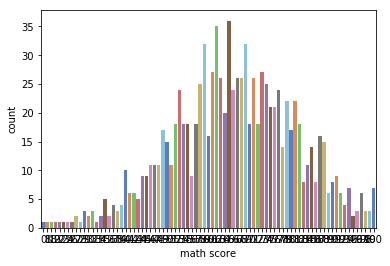

In [8]:
sns.countplot(x="math score", data = df, palette="muted")
plt.show()

#### How many students passed in Math exam ?

In [9]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

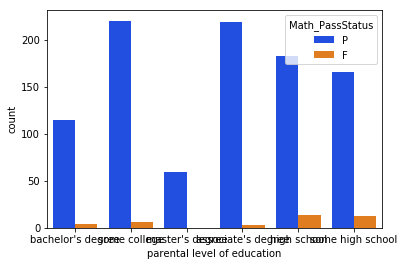

In [10]:
sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
plt.show()

#### Let us explore the Reading score

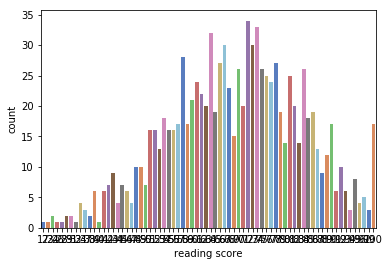

In [11]:
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

#### How many studends passed in reading ?

In [12]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

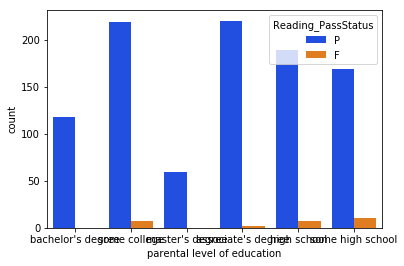

In [13]:
sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
plt.show()

#### Let us explore writing score

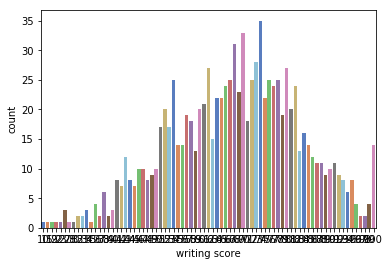

In [14]:
sns.countplot(x="writing score", data = df, palette="muted")
plt.show()

#### How many students passed writing ?

In [15]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

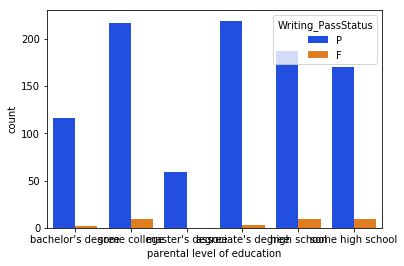

In [16]:
sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
plt.show()

#### Iet us check "How many students passed in all the subjects ?"

In [17]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

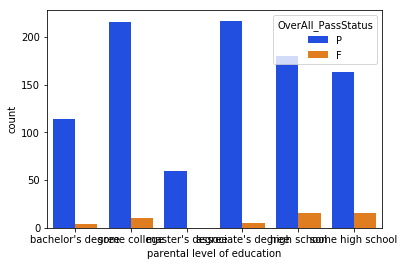

In [18]:
sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
plt.show()

#### Find the percentage of marks

In [19]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

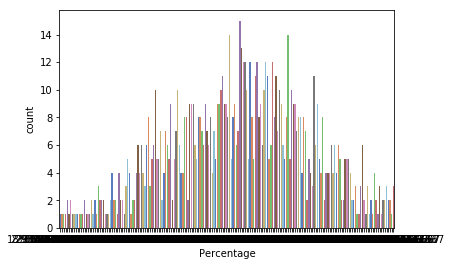

In [20]:
sns.countplot(x="Percentage", data = df, palette="muted")
plt.show()

#### Let us assign the grades

### Grading 
####    above 80 = A Grade
####      70 to 80 = B Grade
####      60 to 70 = C Grade
####      50 to 60 = D Grade
####      40 to 50 = E Grade
####    below 40 = F Grade  ( means Fail )


In [21]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

#### we will plot the grades obtained in a order

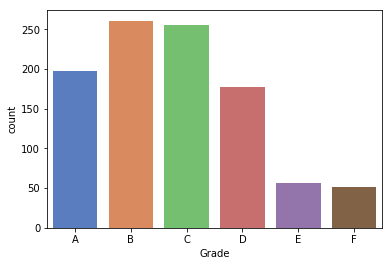

In [24]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

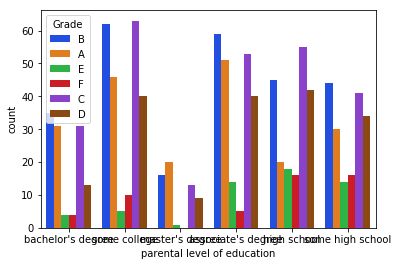

In [23]:
sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
plt.show()